# Capstone Project - NYC Vision Zero Initiative: Is it working?

I did plan on elaborating on this project; however, I was in a biking accident late Saturday night on my way home from work. Long story short, I broke my wrist and it is incredibly slow to type at the moment.

I do plan on completing this (and the reservoir project, including scraping the weather data) so as to add them to a portfolio. But that will have to be put on hold for at least a few days.

Thanks for everything over the past few months. It was a pleasure to be in your class.

Keep in touch,
- dave

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
df = pd.read_csv('/content/drive/MyDrive/07 - LaGuardia ACE Data Analytics/201 - Python/Projects/Raw Data/Capstone - Data/NYC Vision Zero Initiative/Motor_Vehicle_Collisions.csv', low_memory=False)

In [20]:
df.shape

(1531349, 29)

In [21]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [22]:
df.head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,01/01/2013,0:40,NaN,NaN,40.697735,-73.814079,"(40.6977347, -73.8140794)",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2997715,PASSENGER VEHICLE,NaN,NaN,NaN,NaN


#### Missing data

In [23]:
df.isnull().sum()
# We can see a steep increase in null values when describing vehicles and fault of 3 or more cars. 
# Since I'm particularly interested in pedestrian and cyclist safety (and those accidents rarely involve multiple cars), I will drop those columns.

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           473049
ZIP CODE                          473251
LATITUDE                          183437
LONGITUDE                         183437
LOCATION                          183437
ON STREET NAME                    306341
CROSS STREET NAME                 535925
OFF STREET NAME                  1305733
NUMBER OF PERSONS INJURED             17
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       4358
CONTRIBUTING FACTOR VEHICLE 2     209780
CONTRIBUTING FACTOR VEHICLE 3    1432540
CONTRIBUTING FACTOR VEHICLE 4    1510748
CONTRIBUTING FACTOR VEHICLE 5    1526065
COLLISION_ID                           0
VEHICLE TYPE COD

In [24]:
df.drop(['LATITUDE', 'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME', 'OFF STREET NAME',
         'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
         'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'], axis=1, inplace=True)

In [25]:
# Dealing with rows with null values for a very important column - persons injured/killed (possibly 48 rows out of over 1M; therefore I feel comfortable ommitting)
df = df[df['NUMBER OF PERSONS INJURED'].notnull()]
df = df[df['NUMBER OF PERSONS KILLED'].notnull()]

In [26]:
# Verify
df.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          473039
ZIP CODE                         473241
NUMBER OF PERSONS INJURED             0
NUMBER OF PERSONS KILLED              0
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      4351
CONTRIBUTING FACTOR VEHICLE 2    209750
COLLISION_ID                          0
VEHICLE TYPE CODE 1                7981
VEHICLE TYPE CODE 2              240359
dtype: int64

In [27]:
df.shape

(1531313, 17)

In [28]:
df.head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,01/01/2013,0:40,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Outside Car Distraction,NaN,2997715,PASSENGER VEHICLE,NaN


In [29]:
# Convert date column to datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])

In [30]:
# Split YYYY/MM/DD into 3 columns
df['CRASH YEAR']  = df['CRASH DATE'].map(lambda x: x.year)
df['CRASH MONTH'] = df['CRASH DATE'].map(lambda x: x.month)
df['CRASH DAY']   = df['CRASH DATE'].map(lambda x: x.day)

In [31]:
df.head(1)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,CRASH YEAR,CRASH MONTH,CRASH DAY
0,2013-01-01,0:40,NaN,NaN,0.0,0.0,0,0,0,0,0,0,Outside Car Distraction,NaN,2997715,PASSENGER VEHICLE,NaN,2013,1,1


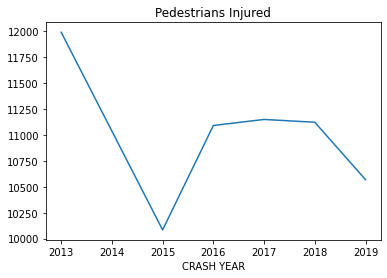

In [32]:
df.groupby(['CRASH YEAR'])['NUMBER OF PEDESTRIANS INJURED'].sum().plot(kind='line', title='Pedestrians Injured');

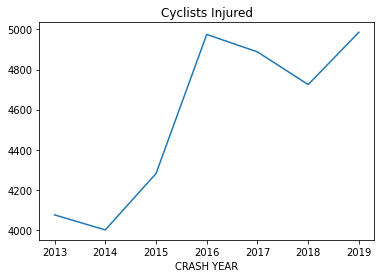

In [33]:
df.groupby(['CRASH YEAR'])['NUMBER OF CYCLIST INJURED'].sum().plot(kind='line', title='Cyclists Injured');

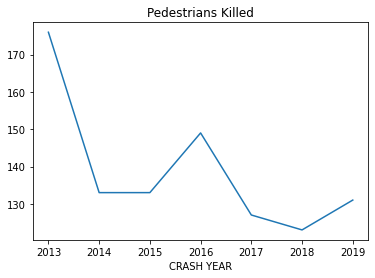

In [34]:
df.groupby(['CRASH YEAR'])['NUMBER OF PEDESTRIANS KILLED'].sum().plot(kind='line', title='Pedestrians Killed');

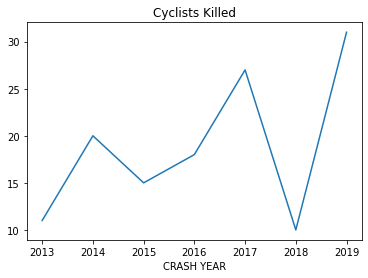

In [35]:
df.groupby(['CRASH YEAR'])['NUMBER OF CYCLIST KILLED'].sum().plot(kind='line', title='Cyclists Killed');

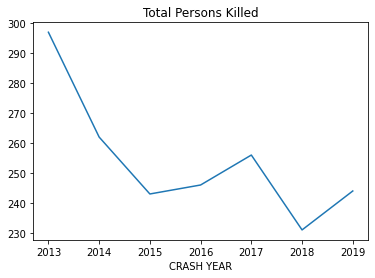

In [36]:
df.groupby(['CRASH YEAR'])['NUMBER OF PERSONS KILLED'].sum().plot(kind='line', title='Total Persons Killed');

In [37]:
# sns.lineplot(data=df, x='CRASH YEAR', y='NUMBER OF PEDESTRIANS INJURED');

In [38]:
df.groupby(['CRASH YEAR'])['NUMBER OF PERSONS KILLED'].sum()

CRASH YEAR
2013    297.0
2014    262.0
2015    243.0
2016    246.0
2017    256.0
2018    231.0
2019    244.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

In [39]:
df.groupby(['CRASH YEAR'])['NUMBER OF PEDESTRIANS KILLED'].sum()

CRASH YEAR
2013    176
2014    133
2015    133
2016    149
2017    127
2018    123
2019    131
Name: NUMBER OF PEDESTRIANS KILLED, dtype: int64

In [40]:
df.groupby(['CRASH YEAR'])['NUMBER OF CYCLIST KILLED'].sum()

CRASH YEAR
2013    11
2014    20
2015    15
2016    18
2017    27
2018    10
2019    31
Name: NUMBER OF CYCLIST KILLED, dtype: int64